La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`tp1` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# (TP) Application au tracé graphique (1h)

## Analyse de la relation durée-distance

### Votre travail
Vous aller devoir exploiter non plus une mesure de temps de vol pour une distance émetteur-récepteur mais regrouper l'ensemble de résultats de mesure
des groupes de TP pour affiner votre mesure de la célérité.

Pour pouvoir tester votre code, des données expérimentales __fictives__ sont entrées dans la cellule suivante.
En TP, vous récupérerez l'ensemble des données de mesure des différents binômes et modifierez ces listes.

In [1]:
import numpy as np  # Pensez à l'alias de la bibliothèques numpy pour la suite.
import matplotlib.pyplot as plt
"""Données expérimentales

Pensez à entre les 4 listes dans le même ordre.
"""
d = np.array([10, 20, 30, 40, 50, 60, 70, 80])  # Liste des distances E-R (en cm - évitez les nombres trop petits)
ud = np.array([0.15, 0.26, 0.16, 0.26, 0.14, 0.12, 0.41, 0.32])  # Liste des incertitudes sur d
dt = np.array([30, 60, 90, 120, 150, 180, 210, 240])  # Liste des temps de vol (en ms)
udt = np.array([5.4, 5.8, 4.6, 6.3, 8.3, 10, 5.1, 3.2])  # Liste des incertitudes sur Delta t

### C'est à vous.

#### Codage
C'est à vous de coder maintenant la cellule suivante est entièrement à votre disposition. Vous devez obtenir en sortie
le graphique représentant $\Delta t$ en fonction $d$.

Pensez bien :
* aux légendes du graphiques
* aux barres d'incertitudes

_On rappelle que les vecteurs contenant les données ont déjà été créé dans la première cellule : `d, ud, dt, udt`. Pensez à utiliser le [modèle](https://pcsi3physiquestan.github.io/intro_python/notebook/plt_presentation.html#un-exemple-basique)._

In [2]:
"""Votre code

A vous de coder le graphique à tracer.
"""
# Créer la fenêtre graphique avec subplots

# Donner un titre (f.suptitle) et des légendes (ax.set_xlabel et ax.set_ylabel)

# Tracer la courbe Delta t (D) avec errorbar

# Afficher une grille (ax.grid) et afficher le graphique (plt.show)

'Votre code\n\nA vous de coder le graphique à tracer.\n'

#### Première analyse des données.
Lorsque vous aurez obtenu le graphique des données expérimentales réelles, analysez le :

* Que cherche-t-on à observer ?
* Observe-t-on ce qu'on attend ?
* Si oui, tant mieux, sinon essayez de comprendre où sont les problèmes.

Ecrire alors le compte-rendu de votre analyse.

## (Travail) Détermination des valeurs de la célérité

### Travail à faire
Cette partie va nous amener à estimer la célérité pour chaque couple de mesure. On réalisera ensuite la moyenne des mesures.

Dans cette partie, le script (les parties à modifier sont clairement explicitées mais il est important de comprendre le reste du code pour être capable de l'écrire soi-même) :
1. réalise pour chaque jeu de données une simulation de Monte-Carlo pour estimer la célérité et son incertitude.
    * On simule N = 100000 fois pour chaque jeu de données. Une explication (à comprendre et retenir) sur la méthode est donnée dans le script.
    * Nous sommes dans le cas où on ne connaît pas la distribution associées aux données de vos camarades. On supposera que les distributions pour $\Delta t$ et $d$ sont __gaussiennes__.
2. (vous) estime la célérité par une moyenne de tous les résultats et l'incertitude avec la formule pour une estimation de type A.
	  * On utilise une moyenne arithmétique pour calculer $c_{mes}$ et son incertitude
	  * L'estimation de l'incertitude est alors (k est le nombre de mesure de c obtenues): $ u(C) = \frac{\sigma(echantillons)}{\sqrt{k}}$ où $\sigma(echantillons)$ est l'écart-type du vecteur échantillons.
3. représente sur un graphique chaque valeur de c pour chaque jeu de données avec une barre d'incertitude et la moyenne calculée.
	  * le numéro des binômes en abscisses (pas d'incertitude là dessus !)
    * la moyenne par une droite donc par deux points $[0, c_{mes}], [k+1, {c_mes}]$.
4. représente sur un autre graphique les écarts normalisés à la moyenne des mesures pour vérifier la cohérence des mesures entre elles.

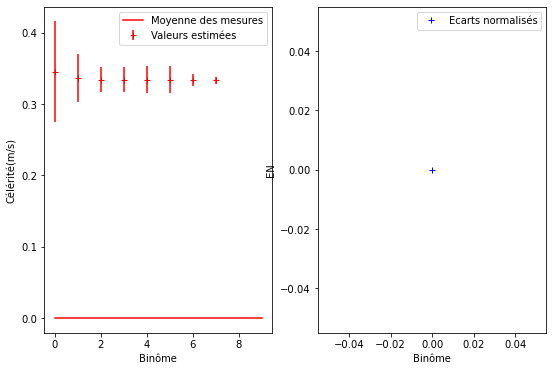

0


In [3]:
""" PARTIE DEJA ECRITE"""
"""On importe pour vous la bibliothèque random 
et la bibliothèque matplotlib.pyplot
"""
import numpy.random as rd
import matplotlib.pyplot as plt

"""
On vous montre comment créer un tableau de taille N*k
où chaque colonne simule les tirages d_i du groupe i suivant une distribution choisie.
Il suffit pour cela d'entrer un vecteur de valeurs pour la moyenne et l'incertitude
au lieu de rentrer une valeur seule.
"""
N = 100000
k = len(d)  # Pour obtenir le nombre de mesures réaliser : la taille de la liste d.
d_sim = rd.normal(d, ud, (N, k))  # Il faut préciser la taille du tableau N lignes et k colonnes
dt_sim = rd.normal(dt, udt, (N, k))

"""
Calcul des c et de u(c) pour chaque binomes : moyenne de chaque colonne.
La fonction np.mean possède une option np.mean(..., axis=0) qui permet justement de faire des moyennes que par colonnes.

Même principe pour l'écart-type avec l'utilisation de l'option axis=0
"""
c_binomes = d_sim / dt_sim  # Calcul de c pour chaque échantillons et chaque binomes de TP.
c_sim = np.mean(c_binomes, axis = 0)  # Moyenne par colonne : on a la célérité de chaque binôme.
uc_sim = np.std(c_binomes, ddof=1, axis=0)  # Ecart-type par colonne :on a l'incertitude de chaque binôme.
""" FIN DE LA PARTIE ECRITE
---------------------------------------------------------------------------------------
"""


"""
---------------------------------------------------------------------------------------
A VOUS DE CODER
C'est à vous maintenant de :
- calculer la moyenne des célérités estimées précédemment
- calculer l'incertitude-type sur la célérité au moyen de la formule donnée dans l'énoncé.
N'hésitez pas à afficher les variables c_sim et uc_sim pour voir leur contenu.
"""
c0 = 0  # A modifier
uc0 = 0  # A modifier

"Calcul des écarts normalisés à la moyenne pour chaque binomes"
en_binomes = 0  # A modifier

"""
FIN DE LA PARTIE A MODIFIER
---------------------------------------------------------------------------------------
"""

"""
PARTIE DEJA ECRITE
---------------------------------------------------------------------------------------
Tracé graphique
On montre comment tracer les valeurs de célérité avec leurs incertitude et les écarts normalisés dans la même fenêtre.

Seule nouveauté, le tracé de la valeur moyenne. Voici l'instruction (ax représente les axes).
"""
f, ax = plt.subplots(1, 2, figsize=(9, 6))  # Fenêtre graphique avec deux zones de tracé.
f.suptitle('')  # Donner un titre au graphique

"""Tracé des valeurs de célérité avec incertitude pour chaque groupe"""
ax[0].set_xlabel('Binôme')
ax[0].set_ylabel('Célérité(m/s)')

ax[0].errorbar(np.arange(k), c_sim, yerr=uc_sim, label="Valeurs estimées", marker='+', linestyle='', color='red')
ax[0].plot([0, k+1], [c0, c0], color='red', label="Moyenne des mesures")
ax[0].legend()

"""Tracé des écarts normalisés"""


ax[1].set_xlabel('Binôme')
ax[1].set_ylabel('EN')

ax[1].plot(en_binomes, label="Ecarts normalisés", marker='+', linestyle='', color='blue') 
ax[1].legend()

plt.show()
"""
FIN DU TRACE GRAPHIQUE
---------------------------------------------------------------------------------------
"""



"""
---------------------------------------------------------------------------------------
A VOUS DE CODER
Calcul de l'écart normalisé entre c0 et la valeur données dans la littérature
"""
en_c = 0 # A modifier
print(en_c)

### Analyse des données
Réalisez une analyse des valeurs obtenues pour chaque groupe puis de la célérité moyenne en comparaison avec la valeur donnée dans la littérature.